Pokemon Data science project

In [155]:
#Imports for project
import pandas as pd  # access to pandas-defined classes and their methods
import matplotlib.pyplot as plt #use this for making graphs
from scipy.stats import ttest_ind #use this for doing stats between group averages


In [156]:
# import the data from the "pokemondata" file
poke = "Pokemondata.csv"  # hardcoded (Since there is only one DB I am currently using)

df = pd.read_csv(poke)
display(df) # formatted, with leading index row
#printed this for reference

,index,pokedex_number,name,german_name,generation,status,species,type_1,type_2,height_m,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,1,Bulbasaur,Bisasam,1,Normal,Seed Pokémon,Grass,Poison,0.7,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,2,Ivysaur,Bisaknosp,1,Normal,Seed Pokémon,Grass,Poison,1.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,3,Venusaur,Bisaflor,1,Normal,Seed Pokémon,Grass,Poison,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,4,3,Mega Venusaur,Bisaflor,1,Normal,Seed Pokémon,Grass,Poison,2.4,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,5,4,Charmander,Glumanda,1,Normal,Lizard Pokémon,Fire,NaN,0.6,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1041,896,Glastrier,Polaross,8,Sub Legendary,Wild Horse Pokémon,Ice,NaN,2.2,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,1042,897,Spectrier,Phantoross,8,Sub Legendary,Swift Horse Pokémon,Ghost,NaN,2.0,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,1043,898,Calyrex,Coronospa,8,Legendary,King Pokémon,Psychic,Grass,1.1,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,1044,898,Calyrex Ice Rider,Coronospa,8,Legendary,High King Pokémon,Psychic,Ice,2.4,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [157]:
#printed this for reference as I am doing case scenarios I have all the columns instead of going back to the file
print(df.columns)


Index(['index', 'pokedex_number', 'name', 'german_name', 'generation',
       'status', 'species', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'growth_rate', 'egg_type_1', 'egg_type_2', 'percentage_male',
       'egg_cycles', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fight',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')


In [158]:
#Notes
#Read Headers
    #df.columns

#Read each Column
    #print(df[['Name', 'Type 1', 'HP']])

#Read Each Row
    #print(df.iloc[0:4])
    # for index, row in df.iterrows():
    #     print(index, row['Name'])
    #df.loc[df['Type 1'] == "Grass"]

#Read a specific location (R,C)
    #print(df.iloc[2,1])

#Sorting/Describing Data
    #df.sort_values(['Type 1', 'HP'], ascending=[1,0])

#Filtering data
    # new_df = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]
    # new_df.reset_index(drop=True, inplace=True)
    # new_df
    # new_df.to_csv('filtered.csv')

#saving output to a desired file
    # df.to_csv('modified.csv', index=False)


First user case scenario: (Scenario with 2 filters)

This user wants to know the fastest fire type pokemon. Pokemon have the possibility of having 2 types. A primary and a secondary. Either way it is fire type so the search needs to include pokemon that have fire as either of it's typings. With there being over 1000 pokemon to narrow the search down only pokemon that fit the criteria of being a fire type and have a speed of at least 100. Taking those results, sort them in a descending order based on speed. Since the user is only interested in speed and typing the results print the pokemon's name, types, and speed. The user finds that Galarian Darmanitan in Zen mode is the fastest fire type pokemon. To give complete data on the winner of the query the full data for the pokemon is printed out.

In [159]:
#First user case scenario: Fastest fire type
fast_fire = df.query("type_1 == 'Fire' or type_2 == 'Fire'")
most_fast = fast_fire.query("speed > 100")
final_fast = most_fast.sort_values(by="speed", ascending=False)
display(final_fast[['name', 'type_1', 'type_2','speed']])
display(final_fast.iloc[0])

,name,type_1,type_2,speed
658,Galarian Darmanitan Zen Mode,Ice,Fire,135
776,Talonflame,Fire,Flying,126
951,Cinderace,Fire,NaN,119
890,Salazzle,Poison,Fire,117
281,Mega Houndoom,Dark,Fire,115
475,Infernape,Fire,Fighting,108
942,Blacephalon,Fire,Ghost,107
781,Pyroar,Fire,Normal,106
101,Rapidash,Fire,NaN,105
767,Delphox,Fire,Psychic,104


index                                        659
pokedex_number                               555
name                Galarian Darmanitan Zen Mode
german_name                           Flampivian
generation                                     5
status                                    Normal
species                        Zen Charm Pokémon
type_1                                       Ice
type_2                                      Fire
height_m                                     1.7
weight_kg                                  120.0
abilities_number                               2
ability_1                        Gorilla Tactics
ability_2                                    NaN
ability_hidden                          Zen Mode
total_points                                 540
hp                                           105
attack                                       160
defense                                       55
sp_attack                                     30
sp_defense          

Second user case scenario: Finding the pokemon with the best defenseive stats (must be a normal status pokemon)

In [160]:
#Second user case scenario: Best defense pokemon
df['total_defense'] = (df['hp'] + df['defense'] + df['sp_defense'])
normal_status = df.query("status == 'Normal'")
total_def = normal_status.sort_values(by="total_defense", ascending=False)
display(total_def[['pokedex_number','name', 'total_defense', 'hp', 'defense', 'sp_defense']].head(20))
display(total_def.iloc[0])

,pokedex_number,name,total_defense,hp,defense,sp_defense
262,213,Shuckle,480,20,230,230
294,242,Blissey,400,255,10,135
256,208,Mega Steelix,400,75,230,95
368,306,Mega Aggron,380,70,230,80
301,248,Mega Tyranitar,370,100,150,120
494,411,Bastiodon,366,60,168,138
147,113,Chansey,360,250,5,105
796,681,Aegislash Shield Forme,360,60,150,150
566,476,Probopass,355,60,145,150
629,531,Mega Audino,355,103,126,126


index                        263
pokedex_number               213
name                     Shuckle
german_name             Pottrott
generation                     2
status                    Normal
species             Mold Pokémon
type_1                       Bug
type_2                      Rock
height_m                     0.6
weight_kg                   20.5
abilities_number               3
ability_1                 Sturdy
ability_2               Gluttony
ability_hidden          Contrary
total_points                 505
hp                            20
attack                        10
defense                      230
sp_attack                     10
sp_defense                   230
speed                          5
catch_rate                 190.0
base_friendship             70.0
base_experience            177.0
growth_rate          Medium Slow
egg_type_1                   Bug
egg_type_2                   NaN
percentage_male             50.0
egg_cycles                  20.0
against_no

Third user case scenario: Finding the pokemon with the best offensive stats (must be a normal status pokemon)

In [161]:
#Third user case scenario: Best offense pokemon
#Second user case scenario: Best defense pokemon
df['total_offense'] = (df['attack'] + df['sp_attack'] + df['speed'])
normal_status = df.query("status == 'Normal'")
total_off = normal_status.sort_values(by="total_offense", ascending=False)
display(total_off[['pokedex_number','name', 'total_offense', 'attack', 'sp_attack', 'speed']].head(20))
display(total_off.iloc[0])

,pokedex_number,name,total_offense,attack,sp_attack,speed
771,658,Ash-Greninja,430,145,153,132
308,254,Mega Sceptile,400,110,145,145
536,448,Mega Lucario,397,145,140,112
312,257,Mega Blaziken,390,160,130,100
447,373,Mega Salamence,385,145,120,120
532,445,Mega Garchomp,382,170,120,92
431,359,Mega Absol,380,150,115,115
84,65,Mega Alakazam,375,50,175,150
125,94,Mega Gengar,365,65,170,130
8,6,Mega Charizard Y,363,104,159,100


index                         772
pokedex_number                658
name                 Ash-Greninja
german_name              Quajutsu
generation                      6
status                     Normal
species             Ninja Pokémon
type_1                      Water
type_2                       Dark
height_m                      1.5
weight_kg                    40.0
abilities_number                1
ability_1             Battle Bond
ability_2                     NaN
ability_hidden                NaN
total_points                  640
hp                             72
attack                        145
defense                        67
sp_attack                     153
sp_defense                     71
speed                         132
catch_rate                   45.0
base_friendship              70.0
base_experience             288.0
growth_rate           Medium Slow
egg_type_1           Undiscovered
egg_type_2                    NaN
percentage_male             100.0
egg_cycles    

Average stats per generation: Is a certain generation more powerful on average than another generation?

In [162]:
#Average stats per generation
average_stats_gen = df.groupby("generation").mean("total_points")
display(average_stats_gen [['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']] )

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
generation,,,,,,,
1,424.104167,64.760417,77.302083,71.005208,69.927083,68.598958,72.510417
2,419.140187,71.476636,71.869159,73.822430,66.121495,74.336449,61.514019
3,436.006061,66.806061,81.030303,74.048485,75.600000,71.139394,67.381818
4,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,435.157895,72.292398,82.976608,72.269006,70.929825,68.426901,68.263158
6,442.552941,69.882353,77.188235,77.023529,75.258824,75.200000,68.000000
7,459.232323,71.464646,87.313131,79.202020,77.848485,75.555556,67.848485
8,455.933333,75.200000,83.571429,76.961905,74.904762,74.057143,71.238095


Average stats per typing: The intention with this is to see what average stats look like per typing. Since the data is formated into type 1 and type 2 both are displayed below. There is a third code that displays the difference between the type_1 averages and the type_2 averages. This last display shows if having a type as the first type or second type makes a difference. If 

In [163]:
#Average stats Type 1
average_stats_gen = df.groupby("type_1").mean("total_points")
display(average_stats_gen [['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']])

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
type_1,,,,,,,
Bug,384.617284,57.024691,71.074074,71.802469,56.382716,65.074074,63.259259
Dark,434.543478,70.065217,81.934783,66.391304,71.086957,68.369565,76.695652
Dragon,536.365854,85.243902,107.024390,83.926829,91.731707,84.097561,84.341463
Electric,451.435484,62.241935,74.983871,66.241935,89.548387,71.661290,86.758065
Fairy,439.272727,72.954545,68.090909,70.545455,78.954545,89.181818,59.545455
Fighting,446.404762,72.928571,102.928571,73.666667,57.333333,68.214286,71.333333
Fire,455.015385,69.430769,85.400000,68.107692,86.415385,71.292308,74.369231
Flying,440.000000,69.625000,75.125000,64.375000,73.875000,70.000000,87.000000
Ghost,444.071429,64.809524,73.976190,79.952381,83.476190,78.809524,63.047619


In [164]:
#Average stats Type 2
average_stats_gen = df.groupby("type_2").mean("total_points")
display(average_stats_gen [['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']])

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
type_2,,,,,,,
Bug,377.000000,57.333333,72.222222,65.444444,60.000000,72.111111,49.888889
Dark,485.370370,77.000000,109.666667,71.814815,80.629630,69.777778,76.481481
Dragon,544.531250,92.812500,93.875000,93.281250,102.812500,84.406250,77.343750
Electric,437.909091,76.181818,80.272727,85.454545,74.272727,66.454545,55.272727
Fairy,441.634146,64.365854,69.097561,75.439024,81.658537,84.000000,67.073171
Fighting,521.000000,80.125000,112.343750,83.312500,80.250000,78.656250,86.312500
Fire,490.294118,74.470588,81.352941,78.058824,98.647059,77.470588,80.294118
Flying,455.767857,71.946429,80.883929,68.919643,77.098214,71.767857,85.151786
Ghost,471.576923,66.269231,89.923077,82.038462,82.884615,80.807692,69.653846


In [165]:
#Difference between Average stats of Type 1 and Type 2
average_stats_gen_type1 = df.groupby("type_1").mean("total_points")
average_stats_gen_type2 = df.groupby("type_2").mean("total_points")
average_stats_gen_difference = (average_stats_gen_type1 - average_stats_gen_type2)
display(average_stats_gen_difference [['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']])

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
type_1,,,,,,,
Bug,7.617284,-0.308642,-1.148148,6.358025,-3.617284,-7.037037,13.370370
Dark,-50.826892,-6.934783,-27.731884,-5.423510,-9.542673,-1.408213,0.214171
Dragon,-8.165396,-7.568598,13.149390,-9.354421,-11.080793,-0.308689,6.997713
Electric,13.526393,-13.939883,-5.288856,-19.212610,15.275660,5.206745,31.485337
Fairy,-2.361419,8.588692,-1.006652,-4.893570,-2.703991,5.181818,-7.527716
Fighting,-74.595238,-7.196429,-9.415179,-9.645833,-22.916667,-10.441964,-14.979167
Fire,-35.278733,-5.039819,4.047059,-9.951131,-12.231674,-6.178281,-5.924887
Flying,-15.767857,-2.321429,-5.758929,-4.544643,-3.223214,-1.767857,1.848214
Ghost,-27.505495,-1.459707,-15.946886,-2.086081,0.591575,-1.998168,-6.606227


Correlation between various attributes

In [166]:
#Number of pokemon per type
count = df['type_1'].value_counts()
count2 = df['type_2'].value_counts()
print(count)
print(count2)

t1_vs_t2 = count.corr(count2)
print(format(t1_vs_t2, '.4f'))

Water       134
Normal      115
Grass        91
Bug          81
Psychic      81
Fire         65
Electric     62
Rock         60
Dark         46
Ghost        42
Fighting     42
Poison       41
Ground       41
Dragon       41
Ice          37
Steel        36
Fairy        22
Flying        8
Name: type_1, dtype: int64
Flying      112
Fairy        41
Psychic      40
Ground       39
Poison       38
Steel        35
Fighting     32
Dragon       32
Grass        28
Dark         27
Ghost        26
Ice          20
Water        20
Fire         17
Rock         15
Normal       11
Electric     11
Bug           9
Name: type_2, dtype: int64
-0.5620


In [167]:
height_total = (df['height_m'].corr(df['total_points']))
print("There is a correlation of " + (format(height_total, '.4f')) + " between height and stat total")


weight_total = (df['weight_kg'].corr(df['total_points']))
print("There is a correlation of " + (format(weight_total, '.4f')) + " between weight and stat total")



There is a correlation of 0.3743 between height and stat total
There is a correlation of 0.4772 between weight and stat total


In [168]:
display(df[['pokedex_number', 'name', 'generation', 'status', 'species', 'type_1', 'type_2', 'height_m', 'weight_kg','abilities_number', 
'ability_1', 'ability_2', 'ability_hidden','total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed', 'catch_rate', 'base_friendship', 
'base_experience','growth_rate', 'egg_type_1', 'egg_type_2', 'percentage_male','egg_cycles']].corr())

,pokedex_number,generation,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,percentage_male,egg_cycles
pokedex_number,1.000000,0.963664,0.065656,0.120535,-0.157993,0.136512,0.117898,0.122968,0.099078,0.096609,0.084225,0.029577,-0.102907,-0.168599,0.122595,-0.035493,0.233382
generation,0.963664,1.000000,0.055697,0.084619,-0.139946,0.091050,0.098174,0.088075,0.063270,0.065377,0.051344,0.002355,-0.067214,-0.137418,0.071540,-0.023382,0.187932
height_m,0.065656,0.055697,1.000000,0.649098,-0.169649,0.374311,0.374797,0.205505,0.305927,0.202550,0.308383,0.137067,-0.305905,-0.360000,0.493568,0.044297,0.241525
weight_kg,0.120535,0.084619,0.649098,1.000000,-0.237923,0.477182,0.440053,0.426925,0.469833,0.236694,0.302330,0.049318,-0.292317,-0.417488,0.437577,0.041955,0.441486
abilities_number,-0.157993,-0.139946,-0.169649,-0.237923,1.000000,-0.432820,-0.177255,-0.328223,-0.247016,-0.396759,-0.292770,-0.280959,0.359376,0.291510,-0.413007,-0.181521,-0.500926
total_points,0.136512,0.091050,0.374311,0.477182,-0.432820,1.000000,0.650568,0.733028,0.629656,0.732795,0.719940,0.561368,-0.727788,-0.327835,0.929630,0.115900,0.542124
hp,0.117898,0.098174,0.374797,0.440053,-0.177255,0.650568,1.000000,0.443752,0.299977,0.371185,0.392835,0.189705,-0.472134,-0.141498,0.652145,-0.027093,0.388345
attack,0.122968,0.088075,0.205505,0.426925,-0.328223,0.733028,0.443752,1.000000,0.456565,0.369529,0.266685,0.373712,-0.529661,-0.310071,0.639279,0.199572,0.386376
defense,0.099078,0.063270,0.305927,0.469833,-0.247016,0.629656,0.299977,0.456565,1.000000,0.222737,0.544896,0.004664,-0.442251,-0.202479,0.528211,0.024300,0.280860
sp_attack,0.096609,0.065377,0.202550,0.236694,-0.396759,0.732795,0.371185,0.369529,0.222737,1.000000,0.510727,0.445268,-0.533384,-0.277883,0.701748,0.113348,0.431873


Histogram of the distrubution of the total stat points the pokemon have. Intially down with all pokemon but later was broken down by status.

array([[<AxesSubplot:title={'center':'total_points'}>]], dtype=object)

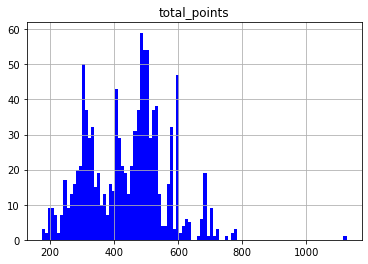

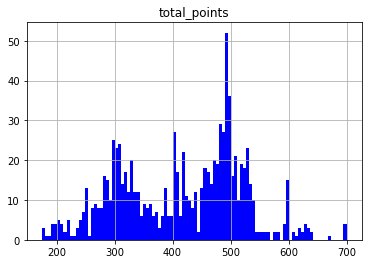

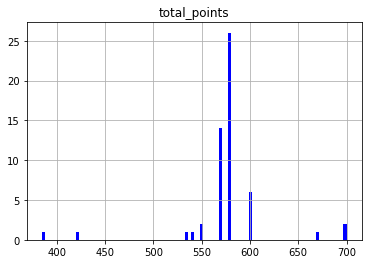

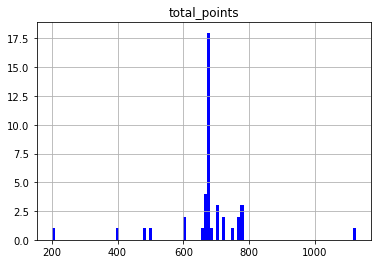

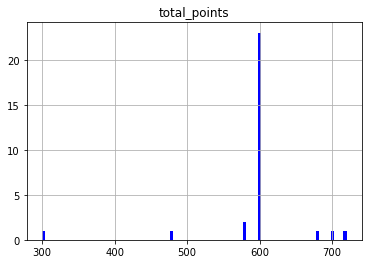

In [169]:
df.hist(column='total_points', bins=100, grid=True, rwidth=200, color='blue')

normal_total = df.query("status == 'Normal'")
normal_total.hist(column='total_points', bins=100, grid=True, rwidth=200, color='blue')

sub_legendary_total = df.query("status == 'Sub Legendary'")
sub_legendary_total.hist(column='total_points', bins=100, grid=True, rwidth=200, color='blue')

legendary_total = df.query("status == 'Legendary'")
legendary_total.hist(column='total_points', bins=100, grid=True, rwidth=200, color='blue')

mythical_total = df.query("status == 'Mythical'")
mythical_total.hist(column='total_points', bins=100, grid=True, rwidth=200, color='blue')